# Modelos de clasificación

### Información del curso:
- **Nombre del curso**: Introducción al aprendizaje automático
- **Profesor**: Dr. Jesús Emmanuel Solís Pérez
- **Email**: jsolisp@unam.mx
- **Semestre**: 2025-1
- **Fecha**: Diciembre 09, 2024
- **Enlace del curso**: [https://jesolisp.github.io/Curso-Introduccion-Aprendizaje-Automatico](https://jesolisp.github.io/Curso-Introduccion-Aprendizaje-Automatico/docs/home.html)

---

### Información del Notebook:
- **Título del Notebook**: Modelos de clasificación
- **Versión**: 1.0
- **Última modificación**: November 17, 2024
- **Descripción**: Este cuaderno tiene como finalidad dar a conocer las aplicaciones y tipos de aprendizaje automático.

---

### Instrucciones:
1. **Orden de ejecución de celdas**: Ejecute las celdas en el orden presentado para garantizar que las dependencias se manejen adecuadamente.
2. **Envío**: Guarde y envíe este cuaderno como un archivo `.ipynb` antes de la fecha de vencimiento.
3. **Comentarios y documentación**: asegúrese de agregar comentarios y documentación adecuados a su código.

---

### Licencia:
- Este cuaderno se proporciona únicamente con fines educativos. Todos los derechos reservados © 2024 ENES Juriquilla.

---

## Evaluación de modelos de clasificación

En un clasificador binario sólo se evalúan dos clases: clase $0$ y clase $1$. Por ejemplo, para una base de datos de cáncer tenemos:

* _Casos negativos_: Clase $1$ (masas malignas)
* _Casos positivos_: Clase $0$ (masas benignas)

De lo anterior, tenemos 4 tipos de observaciones:

* **True Positives (TP)**. Masas malignas que se clasifican como malignas.
* **False Positives (FP)**. Masas benignas que se clasifican como malignas.
* **True Negatives (TN)**. Masas malignas que se clasifican como malignas.
* **False Negatives (FN)**. Masas malignas que se clasifican como benignas.

Una alternativa y sencilla de comparar cómo el modelo ha clasificado cada observación a partir de la información anterior es la _Matriz de Confusión (MC)_. Esta matriz se puede obtener importando primero `from sklearn.metrics import confusion_matrix` y después llamando a la función `confusion_matrix(real_classes, predictions)`. Graficamente, la MC está dada como sigue:

```{figure} images/TP-FP-FN-TN.png
 ---
 width: 340px
 height: 180px
 name: fig:TP-FP-FN-TN
 ---
 Imagen recuperada de {cite:t}`olson2015best`.
```

### Ratios de clasificación

Para poder utilizar los siguientes ratios, es necesaria la instrucción `from sklearn import metrics`.

* Accuracy (Exactitud)

Mide la cantidad de casos que se han clasificado correctamente a partir de la siguiente expresión

$$
 ACC = \frac{TP + TN}{TP + TN + FP + FN} = \frac{\text{Número de observaciones correctamente clasificadas}}{\text{Número de observaciones totales}}.
$$

Esta métrica es llamada a partir de la función `metrics.accuracy_score(real_classes, predictions)`.

* Precission (Precisión)

Mide la habilidad del modelo para clasificar los casos positivos como positivos

$$
 PRE = \frac{TP}{TP + FP} = \frac{\text{Número de observaciones positivas correctamente clasificadas}}{\text{Número de observaciones clasificadas como positivas}}.
$$

Esta métrica se obtiene al llamar `metrics.average_precision_score(real_classes, predictions)`.

* Sensitivity (Sensibilidad)

Mide la habilidad del modelo para encontrar todos los casos positivos

$$
 SEN = \frac{TP}{TP + FN} = \frac{\text{Número de observaciones positivas clasificadas como positivas}}{\text{Número de observaciones positivas totales}}
$$

Su llamado se hace como `metrics.recall_score(real_classes, predictions)`.

* F1 score

Es una medida ponderada entre SEN y ACC cuya relación está dad como sigue

$$
 F_{1} = 2\cdot \frac{1}{\frac{1}{ACC} + \frac{1}{SEN}} = 2\cdot \frac{ACC\cdot SEN}{ACC + SEN}.
$$

Esta métrica es llamada como `metrics.f1_score(real_classes, predictions)`

* False Positive Ratio

Es una medida de las probabilidades del modelo para asignar una clase positiva a un caso negativo

$$
 FPR = \frac{FP}{FP + TN} = \frac{\text{Número de observaciones negativas clasificadas como positivas}}{\text{Número de observaciones negativas}}.
$$

`fpr(real_classes, predictions)`

* Area Under the Curve (ROC-AUC)

Permite encontrar un modelo que optimice la compensación entre FP y TP. El área debajo de la curva nos permite hacer la elección del modelo. Por ejemplo, si el área se encuentra al 100% entonces el modelo es capaz de distinguir entre resultados negativos y positivos la mayor parte del tiempo. Cuanto menor sea el área, peor será la clasificación.

```{figure} images/ROC.png
 ---
 width: 340px
 height: 180px
 name: fig:ROC.png
 ---
```

Esta métrica es llamada a partir de la función `metrics.roc_auc_score(real_classes, predictions)`.

## Regresión logística

Los modelos lineales también son utilizado para los problemas de clasificación. Si consideramos una clasificación binaria, entonces podemos utilizar la siguiente ecuación

$$
 y = \beta_{0} + \beta_{1}\cdot x_{1} + \beta_{2}\cdot x_{2} + \cdots + \beta_{p}\cdot x_{p} > 0.
$$

Como podemos observar, se parece mucho a la ecuación de un modelo de regresión lineal {eq}`eqn:ols` con la diferencia de que establecemos el umbral del valor predicho en cero. Si la ecuación anterior es menor que cero, predecimos la clase $-1$; si es mayor que cero entonces la clase $+1$.

| Modelo              | Variable objetivo  | Rango variable       |
|:-------------------:|:------------------:|:--------------------:|
| Regresión lineal    | Variable numérica  | (-$\infty$,$\infty$) |
| Regresión logística | Probabilidad clase | $[0,1]$              |

Un clasificador binario separa dos clases utilizando una línea, un plano o un hiperplano. Los dos algoritmos de clasificación lineal más utilizados son: **regresión logística** `linear_model.LogisticRegression` y **máquinas de soporte vectorial lineal** `svm.LinearSVC`.

Al generar una línea, se puede caer en el error de obtener valores distintos de $0$ y $1$. Esto conlleva a que no se estaría cumpliendo la condición de que la probabilidad debe estar en el intervalo $[0,1]$.

Para evitar este problema, la regresión logística {cite}`cox1958regression` transforma el valor obtenido por OLS con una función cuyo rango $\in(0,1)$. En la literatura podemos encontrar diversas funciones que cumplen con lo anterior. La más utilizada es la **función logística** o **sigmoide**:

$$
 \phi(\eta) = \frac{1}{1 + \exp(-\eta)}.
$$ (eqn:logsig)

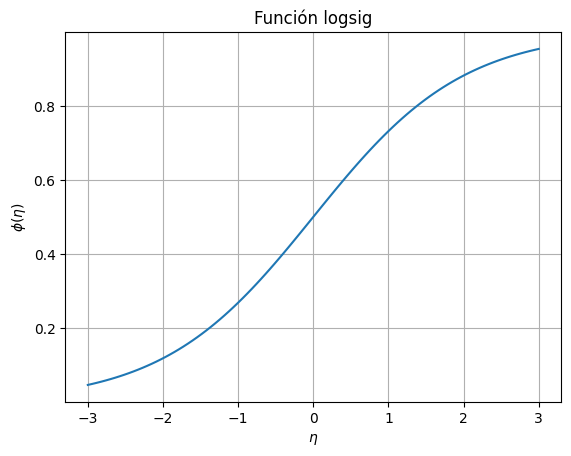

In [1]:
import numpy as np
import matplotlib.pyplot as plt

eta = np.linspace(-3,3,100)

logsig = lambda n: 1/(1 + np.exp(-n)) # <--

#def logsig(n):
#    return 1/(1 + np.exp(-n))

plt.figure()
plt.plot(eta, logsig(eta))
plt.xlabel('$\eta$')
plt.ylabel('$\phi(\eta)$')
plt.title('Función logsig')
plt.grid('on')
plt.show()

Sustituyendo la ecuación del modelo lineal {eq}`eqn:ols` en la ecuación {eq}`eqn:logsig` tenemos

$$
 P(y=1|X = x) = \frac{\beta_{0}\cdot x_{0} + \beta_{1}\cdot x_{1} + \cdots + \beta_{p}\cdot x_{p} + b}{1 + \exp\left( \beta_{0}\cdot x_{0} + \beta_{1}\cdot x_{1} + \cdots + \beta_{p}\cdot x_{p} + b \right)},
$$
donde $P(y=1|X = x)$ se interpreta como la probabilidad de que $y$ adquiera el valor de $1$, dados los predictores $x_{0},x_{1},\dots,x_{p}$.

Ahora bien, `scikit-learn` permite trabajar con un modelo de regresión logística con un parámetro de compensación que rige la fuerza de la regularización llamado **C**. Aquí: 

* Si $C\gg$, entonces el modelo intenta ajustarse al conjunto de entrenamiento lo mejor posible.
* Si $C\ll$, entonces el modelo intenta encontrar un vector de coeficientes $\beta$ cercano a cero.

Además, el parámetro **C** influye de la siguiente manera:

* Si $C<$, entonces los algoritmos intenten ajustarse a la mayor cantidad de datos.
* Si $C>$, entonces los algoritmos tratan de que se clasifiquen correctamente.

```{note}
 Entiendase que $<$ denota un valor 'bajo' (pequeño) y $>$ denota un valor 'alto' (grande).
```

El valor por default en `linear_model.LogisticRegression` es $C = 1$ que proporciona un rendimiento bastante aceptable, con una precisión del 95% tanto en el conjunto de entrenamiento como en el de prueba.

---

# Ejemplo
Para trabajar el modelo de regresión logística, vamos a utilizar la base de datos de cáncer de mama de Wisconsin (diagnóstico) {cite}`BreastCancerWisconsin`

En esta base de datos, las características se calculan a partir de una imagen digitalizada de una masa mamaria. 

**Información de los atributos**
1. Número de identificación
2. Diagnóstico (M = maligno, B = benigno)
3. Variables (32)

Se calculan diez características de valor real para cada núcleo celular:

* radio (media de las distancias desde el centro hasta los puntos del perímetro)
* textura (desviación estándar de los valores de la escala de grises)
* perímetro
* área
* suavidad (variación local en longitudes de radio)
* compacidad (perímetro ^ 2 / área - 1.0)
* concavidad (severidad de las porciones cóncavas del contorno)
* puntos cóncavos (número de porciones cóncavas del contorno)
* simetría
* dimensión fractal ("aproximación de la línea costera" - 1)

La media, el error estándar y "peor" o mayor (media de los tres valores más grandes) de estas características se calcularon para cada imagen, resultando en 30 funciones. Por ejemplo, el campo 3 es Radio medio, campo 13 es Radio SE, el campo 23 es Peor radio.

Todos los valores de las funciones se recodifican con cuatro dígitos significativos. Además, la distribución de clases está dada como: 357 benignas y 212 malignas

Una de las imágenes digitalizadas que conforman la base de datos es la siguiente:

```{figure} images/dataset-card.jpg
 ---
 width: 340px
 height: 180px
 name: fig:dataset-card
 ---
```

In [2]:
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Carga y regresa el conjunto de datos de Wisconsin de cancer de seno (clasificación)
cancer = load_breast_cancer()

pd.DataFrame(cancer.target).value_counts()

0
1    357
0    212
Name: count, dtype: int64

In [3]:
# Reemplazamos los 0 por 1 y 1 por cero de modo que tenemos las siguientes clases:
# Clase 0: Benignas
# Clase 1: Malignas
pd.DataFrame(cancer['target']).replace({1:0,0:1}, inplace=True)

pd.DataFrame(cancer.target).value_counts()

0
0    357
1    212
Name: count, dtype: int64

In [4]:
# 6. Procesamiento de los datos
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.20, random_state = 696)

In [5]:
# 6.1. Creacion del modelo logistico 
logreg = LogisticRegression(solver = 'liblinear')

# 6.2. Ajuste del modelo
logreg.fit(X_train, y_train)

# 6.3. Prediccion del modelo
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

# 7. Obtenemos la puntuación del modelo
print('Training score: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Test score: {:.3f}'.format(logreg.score(X_test, y_test)))

Training score: 0.954
Test score: 0.991


In [6]:
# 7.1. Calculamos las probabilidades de las predicciones sobre el conjunto de entrenamiento
probs_df = pd.DataFrame(logreg.predict_proba(X_train))
probs_df.head()

,0,1
0,9.993142e-01,0.000686
1,0.000000e+00,1.000000
2,9.847362e-01,0.015264
3,2.831031e-07,1.000000
4,9.991062e-01,0.000894


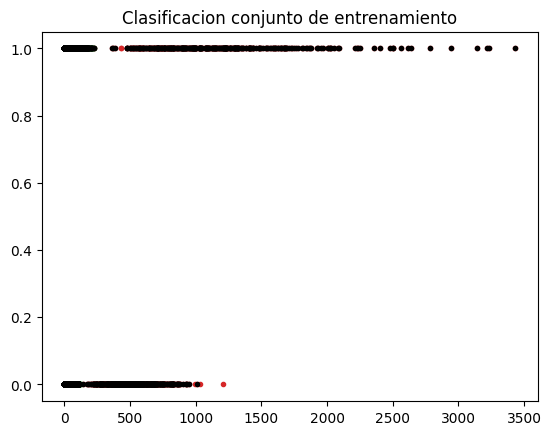

In [7]:
plt.figure()
plt.plot(X_train, y_train, '.')
plt.plot(X_train, y_train_pred, '.k')
plt.title('Clasificacion conjunto de entrenamiento')
plt.show()

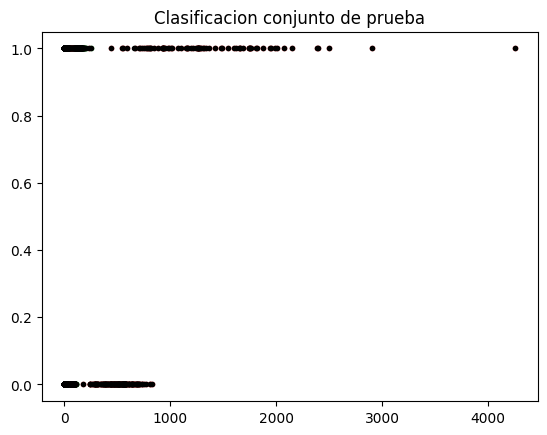

In [8]:
plt.figure()
plt.plot(X_test, y_test, '.')
plt.plot(X_test, y_test_pred, '.k')
plt.title('Clasificacion conjunto de prueba')
plt.show()

In [9]:
def eval_model(target, estimations):
    return {
        'ACC': metrics.accuracy_score(target, estimations),
        'PRE': metrics.average_precision_score(target, estimations),
        'SEN': metrics.recall_score(target, estimations),
        'F1': metrics.f1_score(target, estimations),
        'AuC': metrics.roc_auc_score(target, estimations)
    }

In [10]:
results = {}
results['train'] = eval_model(y_train, y_train_pred)
results['test'] = eval_model(y_test, y_test_pred)
pd.DataFrame(results)

,train,test
ACC,0.953846,0.991228
PRE,0.909386,0.975000
SEN,0.924855,1.000000
F1,0.938416,0.987342
AuC,0.948243,0.993333


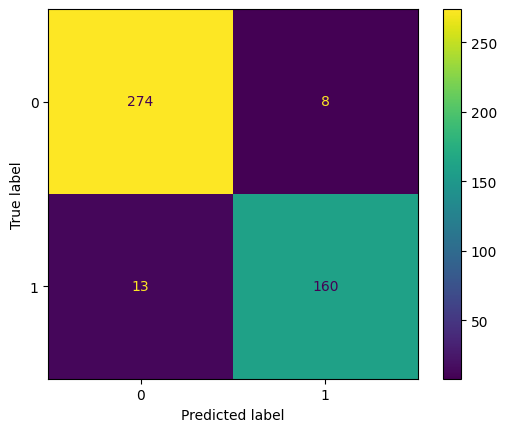

In [11]:
cm = confusion_matrix(y_train, y_train_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

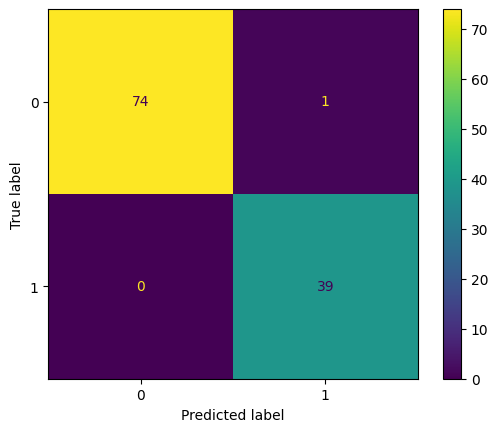

In [12]:
cm = confusion_matrix(y_test, y_test_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

---

# Ejercicio de clase I

Base de datos de diabetes de los Indios Pima del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales

**Información relevante**
* Todos los pacientes son mujeres de al menos 21 años de ascendencia India Pima. 
* Número de instancias: 768
* Número de atributos: 8 más clase

Para cada atributo: (todos con valores numéricos)
1. Número de embarazos (PREG)
2. Concentración de glucosa en plasma a 2 horas en una prueba de tolerancia a la glucosa oral (HPGC)
3. Presión arterial diastólica (mm Hg) (DBP)
4. Espesor del pliegue cutáneo del tríceps (mm) (TSFT)
5. Insulina sérica de 2 horas (mu U / ml) (HSI)
6. Índice de masa corporal (peso en kg / (altura en m) ^ 2) (BMI)
7. Función del pedigrí de la diabetes (RDP)
8. Edad (años) (AGE)
9. Variable de clase (0 o 1) (CLASS)

Distribución de clases: (el valor de clase 1 se interpreta como "positivo a diabetes")

| Valor de la Clase | Número de instancias |
| :---------------: | :------------------: |
| 0                 | 500                  |
| 1                 | 268                  |

---

## _K_ vecinos más cercanos.

El algoritmo de _K_ vecinos es uno de los algoritmos de AA más simples ya que su construcción consiste en almacenar el conjunto de datos de entrenamiento. Para hacer una predicción a partir de un conjunto de datos nuevos, el algoritmo busca los puntos de datos más cercanos en el conjunto de datos de entrenamiento, es decir sus "vecinos más cercanos".

```{figure} images/knn_classification.png
 ---
 height: 280px
 width: 440px
 name: fig:knn_classification
 ---
 Predicciones hechas por el modelo del vecino más cercano.
```

En este tipo de modelos, también se puede considerar un número arbitrario _k_ de vecinos.

Al considerar más vecinos, se asigna una etiqueta. Es decir, para cada punto de prueba se cuenta el número de vecinos que pertenecen a la clase 0 y a la clase 1. Posterior a ello se asigna la clase que es más frecuente. Esto es, la clase mayoritaria entre los vecinos más cercanos.

```{figure} images/knn_classification_3.png
 ---
 height: 280px
 width: 440px
 name: fig:knn_classification_3
 ---
 Predicciones hechas por el modelo del vecino más cercano.
```

Para trabajar con este tipo de modelos, utilizamos la siguiente instrucción `from sklearn.neighbors import KNeighborsClassifier` y creamos una instancia como `kNC = KNeighborsClassifier(n_neighbors=3)`, donde 3 indica el número de vecinos.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Creamos una instancia al modelo de clasificacion de K vecinos
kNC = KNeighborsClassifier(n_neighbors=2)

# Ajustamos el modelo para hacer predicciones
kNC.fit(X_train, y_train)

# Prediccion del modelo K vecinos
y_train_pred_kNC = kNC.predict(X_train)
y_test_pred_kNC = kNC.predict(X_test)

# 7. Obtenemos la puntuación del modelo
print('Training score: {:.3f}'.format(kNC.score(X_train, y_train)))
print('Test score: {:.3f}'.format(kNC.score(X_test, y_test)))

results = {}
results['train'] = eval_model(y_train, y_train_pred_kNC)
results['test'] = eval_model(y_test, y_test_pred_kNC)
pd.DataFrame(results)

Training score: 1.000
Test score: 0.947


,train,test
ACC,1.0,0.947368
PRE,1.0,0.878387
SEN,1.0,0.923077
F1,1.0,0.923077
AuC,1.0,0.941538


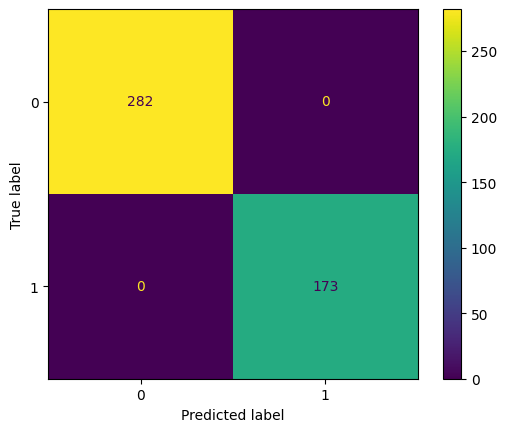

In [18]:
cm = confusion_matrix(y_train, y_train_pred_kNC)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()

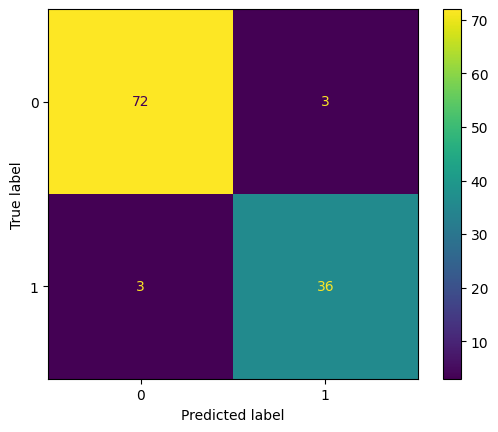

In [20]:
cm = confusion_matrix(y_test, y_test_pred_kNC)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)

cmd.plot(include_values=True, cmap='viridis', ax=None, xticks_rotation='horizontal')
plt.show()